In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/device:GPU:0


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,14,18,20,22,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-3-b680b612240d>:31: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  coloumn_names = df_fars.iloc[[30]].dropna(True)


['Died_Prior_to_Accident' 'Fatal_Injury' 'Incapaciting_Injury'
 'Injured_Severity_Unknown' 'No_Injury' 'Nonincapaciting_Evident_Injury'
 'Possible_Injury' 'Unknown']
predictions: [1 2 5 ... 4 5 5]
groundTruth: 37594    1
70034    5
6432     5
33622    4
48584    4
        ..
59612    4
84590    5
34827    4
84505    6
15059    2
Name: CLASS, Length: 26213, dtype: int64
Naive Bayesian (Gaussian) classifier accuracy: 0.6271697249456376
ROC:  0.8231629547115416
The MSE is: 1.966810361271125


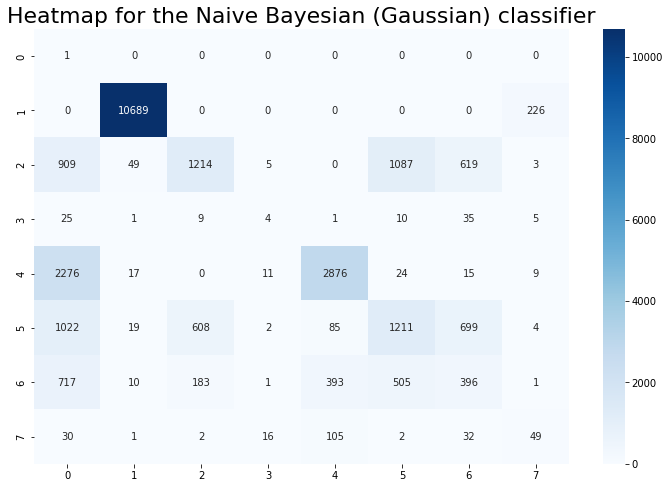

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.decomposition import IncrementalPCA
import seaborn as sns
from sklearn.metrics import roc_auc_score
from google.colab import drive

print(tf.test.gpu_device_name())

df_fars = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/fars.csv')
coloumn_names = df_fars.iloc[[30]].dropna(True)
df_fars = df_fars.drop(df_fars.index[0:33])
coloumn_names = ['Case State', 'Age', 'Sex', 'Person_Type', 'Seating_Position', 'Restraint_system_used',
                 'Air_Bag_availability/Deployment', 'Ejection', 'Ejection_Path', 'Extrication', 'Non_motorist_location',
                 'Police_reported_alcohol_involvment', 'Method_alcohol_determination', 'Alcohol_test_type',
                 'Alcohol_test_results', 'Police_reported_drug_involvment', 'Method_of_drug_determination',
                 'Drug_test_type', 'Drug_test_results_(1_of_3_)', 'Drug_test_type_(2_of_3_)',
                 'Drug_test_results_(2_of_3_)', 'Drug_test_type_(3_of_3_)', 'Drug_test_results_(3_of_3_)',
                 'Hispanic_origin', 'Taken_to_hospital', ' RELATED_FACTOR_(1)-PERSON_LEVEL',
                 ' RELATED_FACTOR_(2)-PERSON_LEVEL',  ' RELATED_FACTOR_(3)-PERSON_LEVEL', 'RACE', 'CLASS']

df_fars = pd.DataFrame(data=df_fars.drop(df_fars.iloc[:, 30:], axis=1))
df_fars.columns = coloumn_names

le = preprocessing.LabelEncoder()
objList = df_fars.select_dtypes(include = "object").columns

for feat in coloumn_names:
    df_fars[feat] = le.fit_transform(df_fars[feat].astype(str))

print(le.classes_) 

x = df_fars.iloc[:, :29]
y = df_fars['CLASS']


scaler = MinMaxScaler()
scaler.fit(df_fars)
scaled = scaler.fit_transform(df_fars)
scaled_df_fars = pd.DataFrame(scaled, columns=df_fars.columns)



X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


# NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train, y_train)
# Make predictions
y_pred = clf.predict(X_test)
print('predictions:',y_pred)
print('groundTruth:', y_test)
# Evaluate accuracy
print('Naive Bayesian (Gaussian) classifier accuracy:', accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true Write data values in each cell of the matrix
plt.subplots(1, figsize=(12,8))
plt.title('Heatmap for the Naive Bayesian (Gaussian) classifier', fontsize=22)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
sns.heatmap(cm, annot=True,cmap='Blues', fmt='g')
plt.savefig('confusion.png')



# List Hyperparameters that we want to tune.
# leaf_size = list(range(1, 4))
# n_neighbors = list(range(1, 4))
# p = [1, 2]


#Convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
# knn_2 = KNeighborsClassifier(n_neighbors=8, leaf_size=1, p=1)
#Use GridSearch
# clf = GridSearchCV(knn_2, hyperparameters, cv=3)
#Fit the model
# best_model = clf.fit(X_train, y_train)
# #Print The value of best Hyperparameters
# print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
# print('Best p:', best_model.best_estimator_.get_params()['p'])
# print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# best_model = knn_2.fit(X_train, y_train)
# pred = knn_2.predict(X_test) #make prediction on test set
# error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse

# print(metrics.accuracy_score(y_test, pred))

# print('-----------------------')
# print(error)#



# # Decide the number of PCA components based on the retained information
# pca = PCA(random_state=20)
# pca.fit(X_train)
# explained_variance = np.cumsum(pca.explained_variance_ratio_)
# plt.vlines(x=5, ymax=1, ymin=0, colors="r", linestyles="--")
# plt.hlines(y=0.95, xmax=40, xmin=0, colors="g", linestyles="--")
# plt.plot(explained_variance)


# # Train the PCA model 
# pca_final = IncrementalPCA(n_components=4) 
# df_train_pca = pca_final.fit_transform(X_train)
 
# # Note that the above can be automated like this: (without using plot)
# pca_final = PCA(0.95)
# df_train_pca = pca_final.fit_transform(X_train)

# # Check the correlations between components
# corr_mat = np.corrcoef(df_train_pca.transpose())
# plt.figure(figsize=[15,8])
# sns.heatmap(corr_mat)
# plt.show()

# # Apply PCA model to the test data
# X_test = pca_final.transform(X_test)

# Train the Logistic Regression model
knn = KNeighborsClassifier(n_neighbors=8, leaf_size=1, p=1)
LR_PCA_Model = knn.fit(X_train, y_train)
pred_test = LR_PCA_Model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, pred_test, multi_class='ovr')
print("ROC: ", roc_auc)

print ("The MSE is:",format(np.power(y_test-knn.predict(X_test),2).mean()))






-------------------------------------------------
Train Accuracy for 1 neighbors :  0.9744444989454064
Test Accuracy for 1 neighbors :  0.6940067905237859
-------------------------------------------------
Train Accuracy for 2 neighbors :  0.8451627671228397
Test Accuracy for 2 neighbors :  0.7122420173196505
-------------------------------------------------
Train Accuracy for 3 neighbors :  0.8291885351776459
Test Accuracy for 3 neighbors :  0.703276999961851
-------------------------------------------------
Train Accuracy for 4 neighbors :  0.810402053596246
Test Accuracy for 4 neighbors :  0.7088849044367299
-------------------------------------------------
Train Accuracy for 5 neighbors :  0.7960137996435637
Test Accuracy for 5 neighbors :  0.7065959638347384
-------------------------------------------------
Train Accuracy for 6 neighbors :  0.7856150161050343
Test Accuracy for 6 neighbors :  0.7045740663029795
-------------------------------------------------
Train Accuracy for 7 n

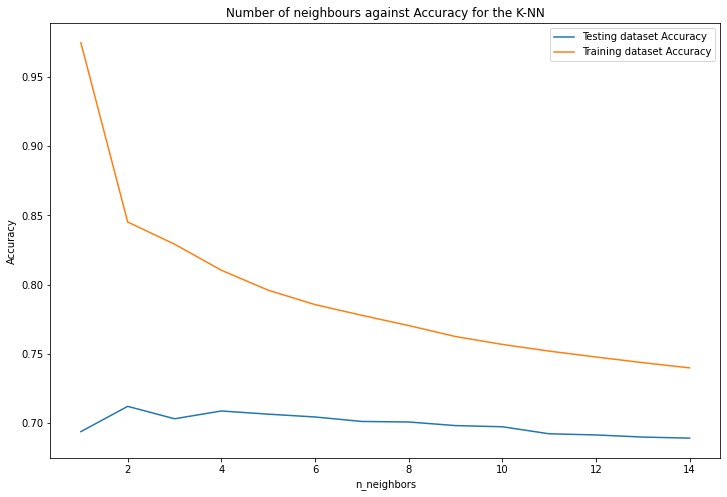

In [ ]:
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    print("-------------------------------------------------")
    print("Train Accuracy for {} neighbors : ".format(k), train_accuracy[i])
    print("Test Accuracy for {} neighbors : ".format(k), test_accuracy[i])
# Generate plot
plt.subplots(1, figsize=(12,8))
plt.plot(neighbors, test_accuracy, label='Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label='Training dataset Accuracy')

plt.legend()
plt.title('Number of neighbours against Accuracy for the K-NN', fontsize=22)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.savefig("neigh_acc_plot.png")
plt.show()
